In [1]:
import geopandas as gpd # Loading geospatial data
import pandas as pd # Tabular data
from taumahi import kupu_māori # Detecting Māori words
import seaborn as sns # Plotting
sns.set()
pd.set_option('display.max_rows', 200)

In [2]:
df = gpd.read_file("lds-nz-roads-addressing-FGDB.zip!nz-roads-addressing.gdb")
df

,road_id,geometry_class,road_type,road_name_class,full_road_name,road_name_label,road_name_prefix,road_name_body,road_name_type,road_name_suffix,route_name_body,route_name_number,route_name_alpha,route_name_suffix,full_road_name_ascii,road_name_label_ascii,road_name_body_ascii,geometry
0,3073671,Addressing Road,Unknown,Road Designation,State Highway 73A,SH 73A,None,None,None,None,State Highway,73.0,A,None,State Highway 73A,SH 73A,None,"MULTILINESTRING ((172.52566 -43.54343, 172.525..."
1,3073717,Addressing Road,Unknown,Road Designation,State Highway 71,SH 71,None,None,None,None,State Highway,71.0,None,None,State Highway 71,SH 71,None,"MULTILINESTRING ((172.64672 -43.37443, 172.647..."
2,3073674,Addressing Road,Unknown,Road Designation,State Highway 53,SH 53,None,None,None,None,State Highway,53.0,None,None,State Highway 53,SH 53,None,"MULTILINESTRING ((175.45919 -41.21821, 175.458..."
3,3073698,Addressing Road,Unknown,Road Designation,State Highway 62,SH 62,None,None,None,None,State Highway,62.0,None,None,State Highway 62,SH 62,None,"MULTILINESTRING ((173.81710 -41.48653, 173.827..."
4,3073673,Addressing Road,Unknown,Road Designation,State Highway 20A,SH 20A,None,None,None,None,State Highway,20.0,A,None,State Highway 20A,SH 20A,None,"MULTILINESTRING ((174.78502 -36.98478, 174.785..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78940,3033968,Addressing Road,Unknown,Road,Jones Avenue,Jones Ave,None,Jones,Avenue,None,None,NaN,None,None,Jones Avenue,Jones Ave,Jones,"MULTILINESTRING ((168.77638 -45.00638, 168.777..."
78941,3036998,Addressing Road,Unknown,Road,Wanganui Road,Wanganui Rd,None,Wanganui,Road,None,None,NaN,None,None,Wanganui Road,Wanganui Rd,Wanganui,"MULTILINESTRING ((175.37217 -40.06787, 175.370..."
78942,3040670,Addressing Road,Unknown,Road,Wellington Urban Motorway,Wellington Urban Mwy,None,Wellington Urban,Motorway,None,None,NaN,None,None,Wellington Urban Motorway,Wellington Urban Mwy,Wellington Urban,"MULTILINESTRING ((174.77204 -41.29388, 174.771..."
78943,3049837,Addressing Road,Unknown,Road,Ahuroa Road,Ahuroa Rd,None,Ahuroa,Road,None,None,NaN,None,None,Ahuroa Road,Ahuroa Rd,Ahuroa,"MULTILINESTRING ((174.66110 -36.51192, 174.661..."


In [3]:
df["is_māori"] = df.full_road_name[~pd.isna(df.full_road_name)].apply(lambda name: len(kupu_māori(name)) > 0)
df.is_māori.value_counts(dropna=False)

False    61179
True     14577
NaN       3189
Name: is_māori, dtype: int64

In [4]:
display(df[df.is_māori == True][["full_road_name", "is_māori"]])
display(df[df.is_māori == False][["full_road_name", "is_māori"]])

,full_road_name,is_māori
5,State Highway 30 Te Teko,True
140,Marama Street,True
148,Wiremu Way,True
162,Matai Street,True
172,Tawiri Place,True
...,...,...
78931,Mera Road,True
78938,Hamiora Street,True
78939,Atawhai Drive,True
78941,Wanganui Road,True


,full_road_name,is_māori
0,State Highway 73A,False
1,State Highway 71,False
2,State Highway 53,False
3,State Highway 62,False
4,State Highway 20A,False
...,...,...
78936,Woodford Avenue,False
78937,Laban Place,False
78940,Jones Avenue,False
78942,Wellington Urban Motorway,False


Text(0.5, 1.0, 'Road names containing Māori words in NZ')

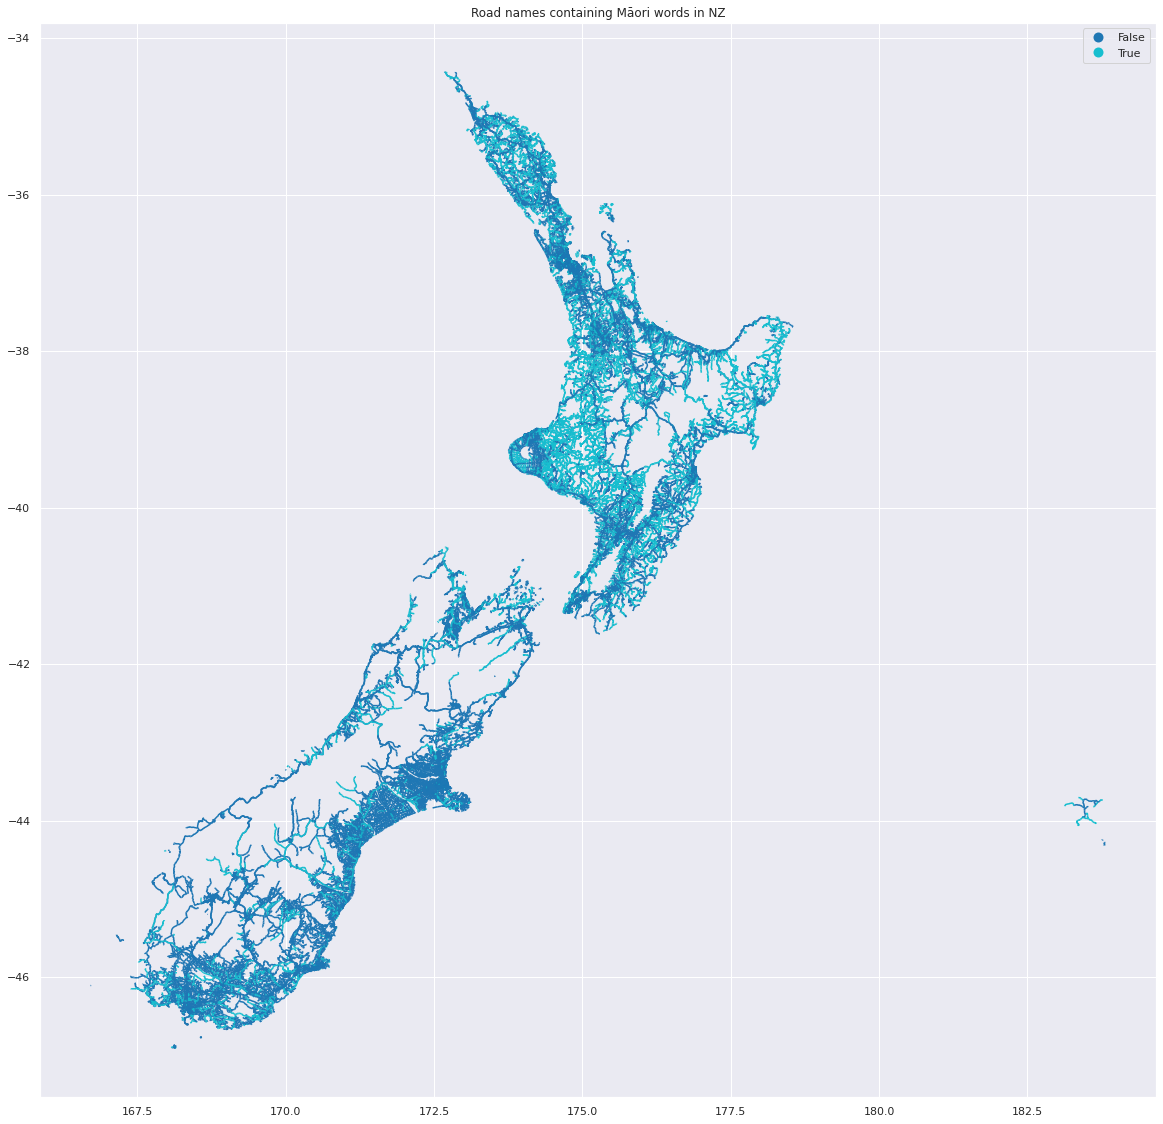

In [5]:
ax = df.plot(column="is_māori", legend=True, figsize=(20,20), categorical=True)
ax.set_title("Road names containing Māori words in NZ")

In [6]:
df.to_file("lds-nz-roads-addressing-kupu_māori.gpkg", layer='roads', driver="GPKG")